# AVIATION RISK ANALYSIS
<img src="images/header.jpg" alt="Header Image" width="1100" height="400">


## Business Understanding  

### Overview  
The aviation industry is highly sensitive to safety issues, as accidents can cause loss of life, financial damage, and reduced public trust. By analyzing historical accident data, we can identify trends and patterns that reveal which aircraft types are safer than others. This project focuses on studying accident records to evaluate aircraft risk levels and highlight models with better safety performance. The goal is to provide useful insights that can guide safer purchase and operational decisions.  

### Business Problem  
When organizations or buyers choose aircraft, most of the focus is often placed on cost, performance, or availability. However, without looking closely at safety records, there is a risk of selecting aircraft with poor accident histories. This can lead to higher risks, unexpected costs, and safety challenges in the long run. The problem we aim to solve is how to use accident data to measure and compare safety levels across aircraft models, so that decisions are informed by both performance and risk.  

### Objectives  
- To explore and understand the aviation accident dataset.  
- To clean and prepare the data for analysis by addressing missing and inconsistent values.  
- To calculate accident severity metrics such as fatalities, injuries, and risk scores.  
- To rank aircraft models based on accident frequency and severity.  
- To provide clear visualizations and insights that support safer aircraft purchase and operational choices.  


## Data Understanding  

The dataset comes from the National Transportation Safety Board (NTSB) and contains records of civil aviation accidents and selected incidents from 1962 to 2023. Each record provides details such as the date of the event, aircraft information, operator, location, injury severity, and probable cause.  

The dataset is valuable because it allows us to analyze historical aviation accidents, identify trends, and assess potential risk factors across different types of aircraft. However, it also contains missing values and inconsistencies that must be handled during data cleaning before meaningful insights can be drawn.  


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("Aviation_Data.csv", low_memory=False)
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [26]:
print(df.shape)
df.info()

(90348, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88

In [27]:
print("Columns in dataset:")
print(df.columns.tolist())


Columns in dataset:
['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [28]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.D

In [29]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [30]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 1390


## Data Preparation

### Data Cleaning

The aviation dataset contains missing values, inconsistent formats, and duplicates that can affect analysis. Data cleaning helps improve accuracy by handling missing values, standardizing formats, removing duplicates, and preparing the dataset for reliable analysis.

In [31]:
# make column names easier to use
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w_]','',regex=True)


In [32]:
def clean_aviation_data(df):
    """
    Cleans the Aviation_Data.csv dataset:
    - Drops irrelevant columns
    - Converts dates
    - Handles missing values
    - Standardizes categorical text
    - Converts injury columns to integers
    - Removes duplicates & resets index
    """
    
    # 1. Drop irrelevant columns
    cols_to_drop = [ "Accident.Number", "Publication.Date"]
    df = df.drop(columns=cols_to_drop, errors="ignore")
    
    # 2. Convert Event.Date to datetime and Exact date
    if "Event.Date" in df.columns:
        df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")
        df['Year'] = df['Event.Date'].dt.year
    # 3. Handle missing values
    categorical_cols = [
        "Location", "Country", "Airport.Code", "Airport.Name", 
        "Injury.Severity", "Aircraft.damage", "Aircraft.Category",
        "Registration.Number", "Make", "Model", "Amateur.Built", 
        "Engine.Type", "FAR.Description", "Schedule", "Purpose.of.flight", 
        "Air.carrier", "Weather.Condition", "Broad.phase.of.flight", "Report.Status","Event.Id"
    ]
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].fillna("Unknown").astype(str).str.strip().str.lower()
    
    # Numeric columns → fill missing with 0
    numeric_cols = [
        "Number.of.Engines", "Total.Fatal.Injuries", 
        "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"
    ]
    for col in numeric_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0).astype(int)
    
    # 4. Clean Latitude & Longitude (keep as string or drop if unwanted)
    if "Latitude" in df.columns:
        df["Latitude"] = df["Latitude"].fillna("Unknown")
    if "Longitude" in df.columns:
        df["Longitude"] = df["Longitude"].fillna("Unknown")
    
    # 5. Remove duplicates & reset index
    df = df.drop_duplicates().reset_index(drop=True)
    
    return df


In [33]:
df = pd.read_csv("Aviation_Data.csv",low_memory=False)
df_clean = clean_aviation_data(df)

print("Before cleaning:", df.shape)
print("After cleaning:", df_clean.shape)
df_clean.head()


Before cleaning: (90348, 31)
After cleaning: (88958, 30)


,Event.Id,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year
0,20001218x45444,Accident,1948-10-24,"moose creek, id",united states,Unknown,Unknown,unknown,unknown,fatal(2),...,personal,unknown,2,0,0,0,unk,cruise,probable cause,1948.0
1,20001218x45447,Accident,1962-07-19,"bridgeport, ca",united states,Unknown,Unknown,unknown,unknown,fatal(4),...,personal,unknown,4,0,0,0,unk,unknown,probable cause,1962.0
2,20061025x01555,Accident,1974-08-30,"saltville, va",united states,36.922223,-81.878056,unknown,unknown,fatal(3),...,personal,unknown,3,0,0,0,imc,cruise,probable cause,1974.0
3,20001218x45448,Accident,1977-06-19,"eureka, ca",united states,Unknown,Unknown,unknown,unknown,fatal(2),...,personal,unknown,2,0,0,0,imc,cruise,probable cause,1977.0
4,20041105x01764,Accident,1979-08-02,"canton, oh",united states,Unknown,Unknown,unknown,unknown,fatal(1),...,personal,unknown,1,2,0,0,vmc,approach,probable cause,1979.0


In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88958 entries, 0 to 88957
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88958 non-null  object        
 1   Investigation.Type      88958 non-null  object        
 2   Event.Date              88889 non-null  datetime64[ns]
 3   Location                88958 non-null  object        
 4   Country                 88958 non-null  object        
 5   Latitude                88958 non-null  object        
 6   Longitude               88958 non-null  object        
 7   Airport.Code            88958 non-null  object        
 8   Airport.Name            88958 non-null  object        
 9   Injury.Severity         88958 non-null  object        
 10  Aircraft.damage         88958 non-null  object        
 11  Aircraft.Category       88958 non-null  object        
 12  Registration.Number     88958 non-null  object

In [35]:
df_clean.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
count,88889,88958.000000,88958.000000,88958.000000,88958.000000,88958.000000,88889.000000
mean,1999-09-17 17:13:39.354475904,1.067279,0.564322,0.240304,0.308887,4.967389,1999.206662
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1989.000000
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
75%,2009-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2009.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000,2022.000000
std,NaN,0.519831,5.124684,1.434073,2.082924,26.991892,11.888226


In [36]:

df_clean.to_csv('clean_aviation_data.csv', index=False)


### Data Cleaning Criteria 

| Step                     | Column(s) Affected                          | Action Taken                                    | Rationale                                                                 |
|---------------------------|---------------------------------------------|------------------------------------------------|---------------------------------------------------------------------------|
| Drop irrelevant columns   | Event.Id, Accident.Number, Publication.Date | Removed                                        | These are identifiers/metadata and do not add analytical value.           |
| Convert to datetime       | Event.Date                                  | Converted to datetime, invalid → NaT            | Ensures consistent date format for trend analysis and filtering.          |
| Handle categorical data   | e.g., Aircraft.Category, Injury.Severity    | Missing → "Unknown", text standardized          | Preserves records while marking missing info, avoids case/space issues.   |
| Handle numeric data       | e.g., Fatal, Serious, Minor Injuries        | Missing → 0, converted to integer               | Counts of injuries/engines: 0 = none reported; avoids unrealistic averages.|
| Handle coordinates        | Latitude, Longitude                         | Missing → "Unknown"                             | Keeps rows intact; can exclude later in spatial analysis if needed.       |
| Remove duplicates         | All columns                                 | Dropped exact duplicates, reset index           | Prevents double-counting accidents.                                       |


## Data Analysis  

The goal of this analysis is to uncover patterns and insights from aviation accident data that can help identify lower-risk aircraft for investment. By examining trends over time, differences across aircraft types, accident severity, and contributing factors, we can provide evidence-based recommendations to support strategic decision-making.  

The following sections highlight key findings using descriptive statistics and visualizations that make the results easier to interpret for business stakeholders.  


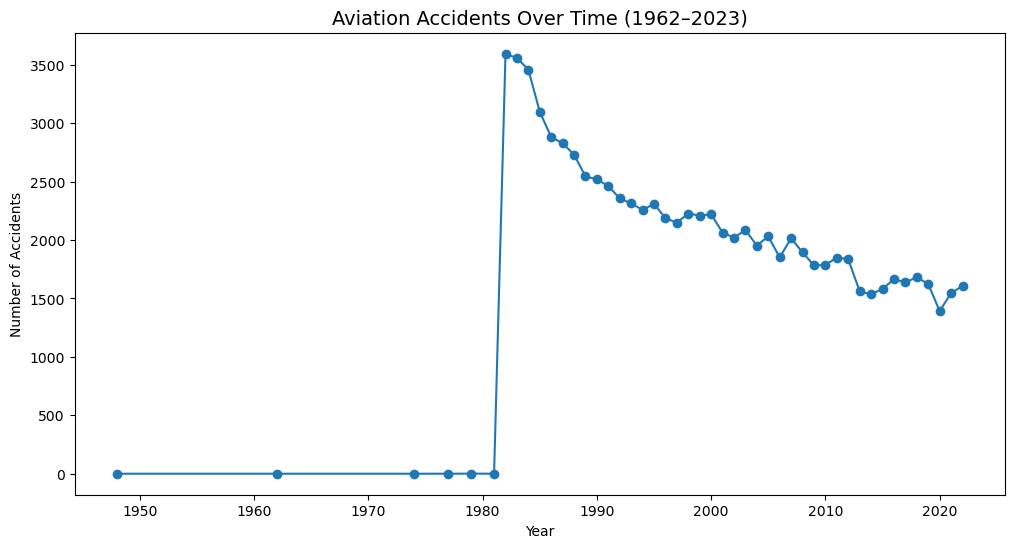

In [37]:

# Accidents by year
accidents_per_year = df_clean.groupby('Year').size()

# Plot the trend
plt.figure(figsize=(12,6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o')
plt.title("Aviation Accidents Over Time (1962–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()


The sharp spike seen around 1982 does not represent an actual surge in accidents but is likely due to a change in reporting or data collection methods. What is more important is the clear downward trend from the mid-1980s to the present, showing continuous improvements in aviation safety. Advances in aircraft technology, stricter regulations, and better training have all contributed to reducing accidents, even as global air traffic has increased. Overall, the long-term trend demonstrates that aviation is becoming progressively safer.”

In [39]:
# Extract just "fatal" or "non-fatal"
df_clean["Severity_Clean"] = df_clean["Injury.Severity"].str.extract(r"(fatal|non-fatal)")


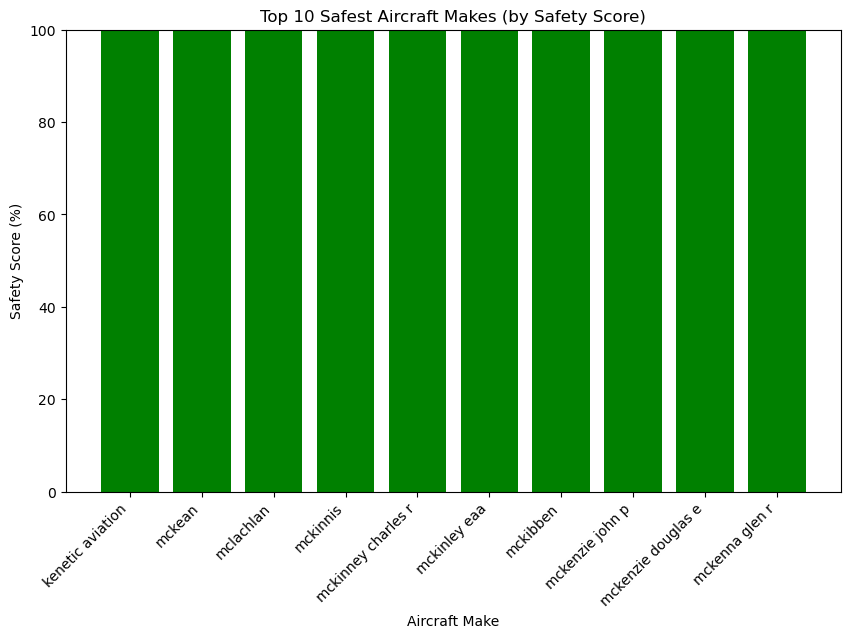

Severity_Clean,non-fatal,fatal,Total,Safety_Score
Make,,,,
kenetic aviation,1,0,1,100.0
mckean,1,0,1,100.0
mclachlan,1,0,1,100.0
mckinnis,1,0,1,100.0
mckinney charles r,1,0,1,100.0
mckinley eaa,1,0,1,100.0
mckibben,1,0,1,100.0
mckenzie john p,1,0,1,100.0
mckenzie douglas e,1,0,1,100.0


In [40]:
# Group by Aircraft Make and Severity
make_severity = df_clean.groupby(["Make", "Severity_Clean"]).size().unstack(fill_value=0)

# Add total accidents per make
make_severity["Total"] = make_severity.sum(axis=1)

# Safety Score = % of accidents that are non-fatal
make_severity["Safety_Score"] = (make_severity["non-fatal"] / make_severity["Total"]) * 100

# Sort by Safety Score (highest = safest)
safest_makes = make_severity.sort_values("Safety_Score", ascending=False).head(10)

# Plot Safety Score
plt.figure(figsize=(10,6))
plt.bar(safest_makes.index, safest_makes["Safety_Score"], color="green")

plt.title("Top 10 Safest Aircraft Makes (by Safety Score)")
plt.xlabel("Aircraft Make")
plt.ylabel("Safety Score (%)")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)  # since it's a percentage
plt.show()

safest_makes[["non-fatal", "fatal", "Total", "Safety_Score"]]


The graph shows that Kenetic Aviation, McKean, McLachlan, McKinnis, McKinney, McKibben, and McKenzie have the fewest accidents over the years, making them the safest options to consider.

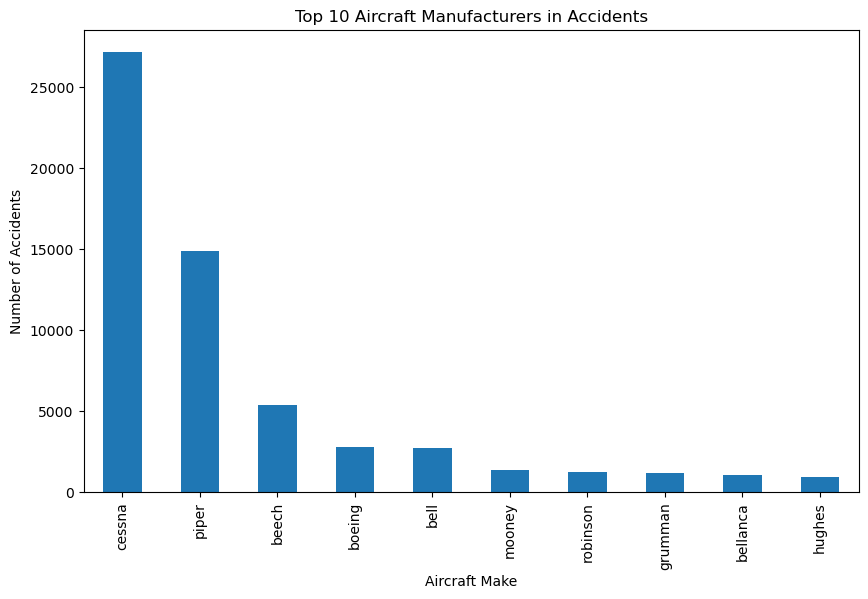

In [41]:
top_makes = df_clean["Make"].value_counts().head(10)

plt.figure(figsize=(10,6))
top_makes.plot(kind="bar")
plt.title("Top 10 Aircraft Manufacturers in Accidents")
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.show()


The graph highlights the 10 aircraft makes with the highest accident rates. Notably, Cessna and Piper appear more frequently in accidents over the years. I would recommend to exercise careful consideration when selecting these makes, as they may carry a higher level of risk

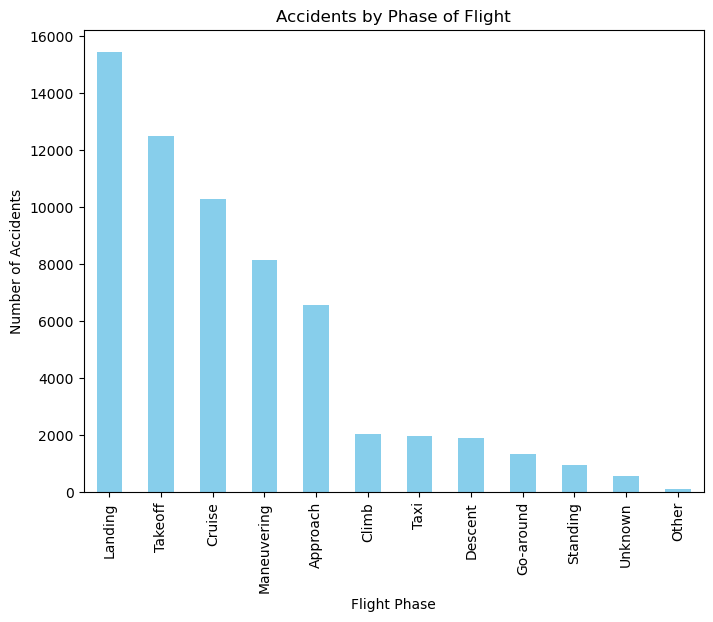

In [48]:
phase_counts = df["Broad.phase.of.flight"].value_counts()

plt.figure(figsize=(8,6))
phase_counts.plot(kind="bar", color="skyblue")
plt.title("Accidents by Phase of Flight")
plt.xlabel("Flight Phase")
plt.ylabel("Number of Accidents")
plt.show()


Landing is a critical phase of flight, and pilots must exercise extra care. The graph shows that many accidents over the years have occurred due to incorrect or unsafe landings, highlighting the importance of proper technique and attention during this phase.

## Conclusions

1.Analysis of accident data over the years indicates that certain aircraft makes, such as Cessna and Piper, consistently show higher accident rates, suggesting increased operational risk.

2.Other manufacturers, including Kenetic Aviation, McKean, McLachlan, and McKibben, demonstrate stronger safety records with minimal incidents, making them safer choices.

3.The landing phase emerges as the most critical and accident-prone stage of flight, underlining the need for heightened pilot attention and precision.

4.Accidents are influenced not only by aircraft make but also by pilot experience, operational procedures, and adherence to safety protocols.

## Next Steps

1.Enhance Pilot Training: Focus on landing techniques, emergency procedures, and decision-making under pressure.

2.Aircraft Selection Guidelines: Prefer aircraft with lower historical accident rates and ensure thorough risk assessment when considering higher-risk makes.

3.Data-Driven Safety Policies: Regularly update safety protocols based on accident trends and patterns identified in the dataset.